In [1]:
# Packages
import nltk
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks') 
colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
# Methods from previous tutorials
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
# Input Dataset
test_file = pd.read_csv('test.csv', header=None)
train_file = pd.read_csv('train.csv', header=None)

In [5]:
# Merge title and content
test_file['Text'] = test_file[1]+' '+test_file[2]
train_file['Text'] = train_file[1]+' '+train_file[2]
test_file = test_file.drop(columns=[1,2])
train_file = train_file.drop(columns=[1,2])

In [6]:
# Edit label
test_file[0].replace(1,'Negative',inplace=True)
test_file[0].replace(2,'Positive',inplace=True)
train_file[0].replace(1,'Negative',inplace=True)
train_file[0].replace(2,'Positive',inplace=True)

In [7]:
# Edit column name
test_file.rename(columns={0:'Sentiment'},inplace=True)
train_file.rename(columns={0:'Sentiment'},inplace=True)

In [8]:
train_file.tail()

,Sentiment,Text
3599995,Negative,Don't do it!! The high chair looks great when ...
3599996,Negative,"Looks nice, low functionality I have used this..."
3599997,Negative,"compact, but hard to clean We have a small hou..."
3599998,Negative,what is it saying? not sure what this book is ...
3599999,Positive,Makes My Blood Run Red-White-And-Blue I agree ...


In [9]:
test_file.tail()

,Sentiment,Text
399995,Negative,Unbelievable- In a Bad Way We bought this Thom...
399996,Negative,"Almost Great, Until it Broke... My son recieve..."
399997,Negative,Disappointed !!! I bought this toy for my son ...
399998,Positive,Classic Jessica Mitford This is a compilation ...
399999,Negative,"Comedy Scene, and Not Heard This DVD will be a..."


In [10]:
train = train_file.copy()
test = test_file.copy()

In [11]:
train['Sentiment'].value_counts()

Positive    1800000
Negative    1800000
Name: Sentiment, dtype: int64

In [12]:
test['Sentiment'].value_counts()

Negative    200000
Positive    200000
Name: Sentiment, dtype: int64

In [13]:
# Generate a random and balanced small sample for coding 
train_pos = train[train['Sentiment']=='Positive'].sample(frac=1)[:5000]
train_neg = train[train['Sentiment']=='Negative'].sample(frac=1)[:5000]

train_sp = pd.concat([train_pos, train_neg], axis=0, ignore_index=True)
train_sp = train_sp.sample(frac=1).reset_index(drop=True)

In [14]:
train_sp.tail()

,Sentiment,Text
9995,Negative,"I read it once, I don't plan to ever read it a..."
9996,Positive,screamin i suggest everyone get at least one p...
9997,Positive,Wonderful Mozart This is a really great album....
9998,Negative,Don't buy this umbrella I have been buying fro...
9999,Positive,Why have I never heard of Sharpe? I would reco...


In [15]:
train_sp['Sentiment'].value_counts()

Negative    5000
Positive    5000
Name: Sentiment, dtype: int64

## 2. Text Processing

In [16]:
# 1. Tokenisation (casual module)
from nltk.tokenize import TweetTokenizer
Tokenizer = TweetTokenizer()

# 2. Remove punctuation
import string

# 3. Remove stopwords
from nltk.corpus import stopwords

# 4. Stemming
from nltk.stem.porter import PorterStemmer

In [17]:
def process_text(text):
    text = str(text)
    tokenized = Tokenizer.tokenize(text)
    tokenized_no_punctuation=[word.lower() for word in tokenized if word not in string.punctuation]
    tokenized_no_stopwords=[word for word in tokenized_no_punctuation if word not in stopwords.words('english')]
    token = [PorterStemmer().stem(word) for word in tokenized_no_stopwords if word != '️']
    return token

In [18]:
train_sp['Token'] = train_sp['Text'].apply(process_text)

In [19]:
train_sp.tail()

,Sentiment,Text,Token
9995,Negative,"I read it once, I don't plan to ever read it a...","[read, plan, ever, read, borrow, book, aunt, d..."
9996,Positive,screamin i suggest everyone get at least one p...,"[screamin, suggest, everyon, get, least, one, ..."
9997,Positive,Wonderful Mozart This is a really great album....,"[wonder, mozart, realli, great, album, enthusi..."
9998,Negative,Don't buy this umbrella I have been buying fro...,"[buy, umbrella, buy, amazon, number, year, alw..."
9999,Positive,Why have I never heard of Sharpe? I would reco...,"[never, heard, sharp, would, recommend, book, ..."


In [20]:
train_sp.to_csv('train_smallsample.csv')

In [273]:
# Randomly split indexes 80/20
train, test  = train_test_split(train_sp, train_size=0.8, random_state=1, stratify=train_sp.Sentiment)

In [274]:
train['Sentiment'].value_counts()

Negative    4000
Positive    4000
Name: Sentiment, dtype: int64

In [275]:
test['Sentiment'].value_counts()

Negative    1000
Positive    1000
Name: Sentiment, dtype: int64

In [276]:
fdist = nltk.FreqDist()
for words in train['Token']:
    for word in words:
        fdist[word] += 1

fdist.most_common()[:20]

[('book', 5036),
 ('one', 3121),
 ('like', 2522),
 ('great', 2399),
 ('good', 2238),
 ('read', 2125),
 ('use', 2035),
 ('...', 1973),
 ('would', 1963),
 ('get', 1933),
 ('time', 1826),
 ('work', 1677),
 ('love', 1556),
 ('movi', 1535),
 ('realli', 1289),
 ('make', 1258),
 ('product', 1248),
 ('buy', 1212),
 ('well', 1184),
 ('even', 1141)]

In [277]:
positives = len(train[train['Sentiment']=='Positive']) # number of positive tweets in the training data

fdist_positive = nltk.FreqDist()
for words in train[train['Sentiment']=='Positive']['Token']:
    for word in np.unique(words): # not counting repeated words this time
        fdist_positive[word] += 1

            
common_positive = pd.Series(dict(fdist_positive))/positives # there is probably a better way to do this
common_positive = common_positive.sort_values(ascending=False)
common_positive.head(20).round(4)

great        0.3318
book         0.2918
one          0.2815
good         0.2448
like         0.2275
love         0.2212
read         0.1918
time         0.1822
get          0.1820
use          0.1720
would        0.1652
well         0.1515
best         0.1475
work         0.1390
...          0.1318
make         0.1298
realli       0.1290
recommend    0.1280
first        0.1235
year         0.1078
dtype: float64

In [278]:
negatives = len(train[train['Sentiment']=='Negative']) # number of negative tweets in the training data

fdist_negative = nltk.FreqDist()
for words in train[train['Sentiment']=='Negative']['Token']:
    for word in np.unique(words): # not counting repeated words this time
        fdist_negative[word] += 1

            
common_negative = pd.Series(dict(fdist_negative))/negatives # there is probably a better way to do this
common_negative = common_negative.sort_values(ascending=False)
common_negative.head(20).round(4)

one        0.2862
like       0.2465
book       0.2458
would      0.2318
get        0.2092
use        0.2020
time       0.1958
...        0.1882
good       0.1840
work       0.1710
buy        0.1618
even       0.1565
read       0.1520
make       0.1412
much       0.1383
product    0.1315
realli     0.1292
money      0.1270
tri        0.1260
better     0.1238
dtype: float64

In [279]:
def comprepw(n):
    # Repeated words from head {n}
    repwords = [x for x in common_positive.head(n).index if x in common_negative.head(n).index]
    print(repwords)

    # Proportion
    print('\nThe similarity of the most {} frequent words between pos and neg:'.format(n), len(repwords)/n)

In [280]:
comprepw(20)

['book', 'one', 'good', 'like', 'read', 'time', 'get', 'use', 'would', 'work', '...', 'make', 'realli']

The similarity of the most 20 frequent words between pos and neg: 0.65


In [283]:
train['Positive'] = np.zeros(len(train))
train.Positive[train['Sentiment']=='Positive'] = 1

In [284]:
test['Positive'] = np.zeros(len(test))
test.Positive[test['Sentiment']=='Positive'] = 1

In [285]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

def design_matrix(feature, series):
    X=series.apply(lambda Token: (feature in Token))
    X= X.astype(int) 
    return X.values.reshape((-1,1)) # converting to a NumPy matrix, as required

# Response: simply retrieving the values in the respose value (as a NumPy array, for technical reasons) 
y_train=train['Positive'].values

# Only use 'great' to predict
X_train = design_matrix('great', train['Token'])
X_test = design_matrix('great', test['Token'])

nbc= BernoulliNB().fit(X_train, np.ravel(y_train))
pred = nbc.predict(X_test)
error  = 1 - accuracy_score(pred, test['Positive'])
print(error.round(3))

0.403


The performance in one feature is imporved then random performance (0.5).

In [326]:
features = pd.Series(dict(fdist))
features = features.sort_values(ascending=False)
#features.head()

In [327]:
len(features)

27294

In [328]:
len(common_positive.index)

17702

In [329]:
len(common_negative.index)

17579

In [330]:
# More than half words appear only once
features.describe().round(0)

count    27294.0
mean        12.0
std         76.0
min          1.0
25%          1.0
50%          1.0
75%          3.0
max       5036.0
dtype: float64

In [331]:
# Seen the words appear 1 times or more as features
features = features[features>5]

In [332]:
len(features)

5070

In [336]:
from sklearn.metrics import log_loss

def training_error(Classifier, feature):
    X_train = design_matrix(feature, train['Token'])
    nbc= Classifier.fit(X_train, np.ravel(y_train))
    prob = nbc.predict_proba(X_train)
    return log_loss(y_train, prob)

In [338]:
losses=[]
for feature in features.index:
    losses.append(training_error(BernoulliNB(), feature))

ranked_blNB = pd.Series(losses, index=features.index).sort_values()

In [339]:
ranked_blNB.head(20)

1920    0.689229
120     0.689248
2001    0.689508
2010    0.689508
2003    0.689514
250     0.689530
20      0.689569
20th    0.689569
2006    0.689579
2008    0.689753
2005    0.689760
2009    0.689760
2007    0.689799
200     0.689801
2004    0.689818
2000    0.690327
1960    0.690450
1/2     0.690597
12      0.690597
21      0.690597
dtype: float64

In [340]:
from scipy.sparse import lil_matrix

def design_matrix(features, series):
    X = lil_matrix((len(series),len(features))) # initialise 
    for i in range(len(series)): 
        tokens = series.iloc[i]
        for j, feature in enumerate(features): # scan the list of features
            if feature in tokens: # if the feature is among the tokens, 
                X[i, j]= 1.0
    return X

In [341]:
p = 100

y_test = test['Positive'].values
features = list(ranked_blNB.index) # storing the list of features in order for later

X_train = design_matrix(features[:], train['Token'])
X_test = design_matrix(features[:], test['Token'])

nbc= BernoulliNB().fit(X_train, np.ravel(y_train))
y_pred = nbc.predict(X_test)
accur = accuracy_score(y_test, y_pred)
error  = 1 - accur
print('Error:', error.round(4))
print('Accuracy: ', accur.round(4))

Error: 0.1615
Accuracy:  0.8385


In [342]:
print(X_train[0])

  (0, 317)	1.0
  (0, 569)	1.0
  (0, 599)	1.0
  (0, 938)	1.0
  (0, 1109)	1.0
  (0, 1266)	1.0
  (0, 1377)	1.0
  (0, 1467)	1.0
  (0, 1476)	1.0
  (0, 1719)	1.0
  (0, 1919)	1.0
  (0, 2243)	1.0
  (0, 2257)	1.0
  (0, 2276)	1.0
  (0, 2646)	1.0
  (0, 2966)	1.0
  (0, 3347)	1.0
  (0, 3442)	1.0
  (0, 3470)	1.0
  (0, 3542)	1.0
  (0, 3830)	1.0
  (0, 3848)	1.0
  (0, 4151)	1.0
  (0, 4159)	1.0
  (0, 4322)	1.0
  (0, 4521)	1.0
  (0, 4655)	1.0
  (0, 4858)	1.0
  (0, 4886)	1.0
  (0, 4888)	1.0
  (0, 4997)	1.0
  (0, 5038)	1.0


In [343]:
# This cell will take a couple of minutes to run, increase the leap in the loop if needed (the leap is currently 20)

from sklearn.model_selection import cross_val_score

test_errors = []
cv_errors = []

n_features = np.arange(0, len(features)+1, 100)
n_features[0] = 1 # the first model has 1 feature, then 100, 200, etc

for p in n_features:
    X_train = design_matrix(features[:p], train['Token'])
    X_test = design_matrix(features[:p], test['Token'])
    nbc= BernoulliNB().fit(X_train, np.ravel(y_train))
    
    scores = cross_val_score(nbc, X_train, y_train, cv=10, scoring = 'accuracy')
    cv_errors.append(1-np.mean(scores))
    
    y_pred_blNB = nbc.predict(X_test)
    test_errors.append(1 - accuracy_score(y_test, y_pred_blNB)) 

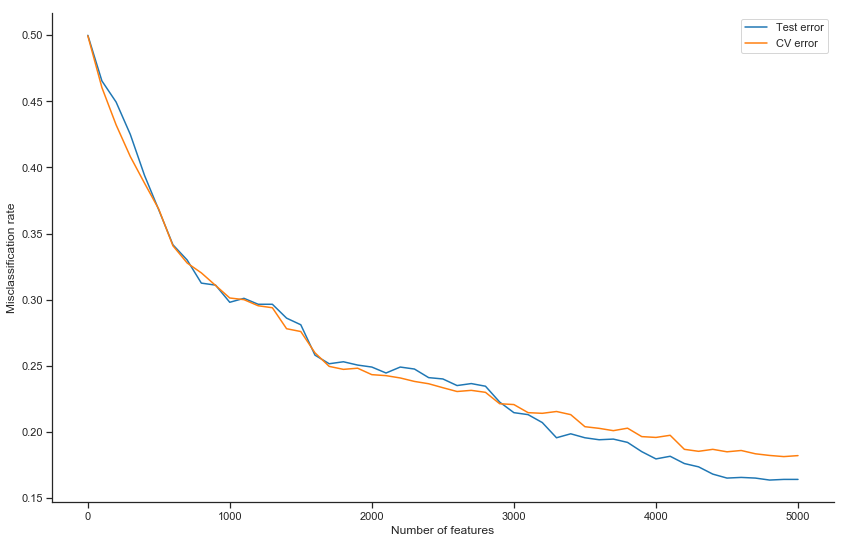

Lowest CV error: K = 4900
Lowest test error: K = 4800

Test misclassification rate for the selected model = 0.164


In [344]:
fig, ax= plt.subplots(figsize=(14,9))
ax.plot(n_features, test_errors, label='Test error')
ax.plot(n_features, cv_errors, label='CV error')
ax.set_xlabel('Number of features')
ax.set_ylabel('Misclassification rate')
plt.legend()
sns.despine()
plt.show()

print('Lowest CV error: K = {}'.format(n_features[np.argmin(cv_errors)])) 
print('Lowest test error: K = {}'.format(n_features[np.argmin(test_errors)]))  

print('\nTest misclassification rate for the selected model = {:.3f}'.format(test_errors[np.argmin(cv_errors)]))

In [345]:
p = int(n_features[np.argmin(cv_errors)])

X_train = design_matrix(features[:p], train['Token'])
X_test = design_matrix(features[:p], test['Token'])
nbc= BernoulliNB().fit(X_train, np.ravel(y_train))
    
y_pred_blNB = nbc.predict(X_test) # classification
y_prob_blNB = nbc.predict_proba(X_test) # predicted probabilities

In [346]:
confusion = confusion_matrix(y_test, y_pred_blNB) 
print(confusion)

[[825 175]
 [153 847]]


Normalized confusion matrix


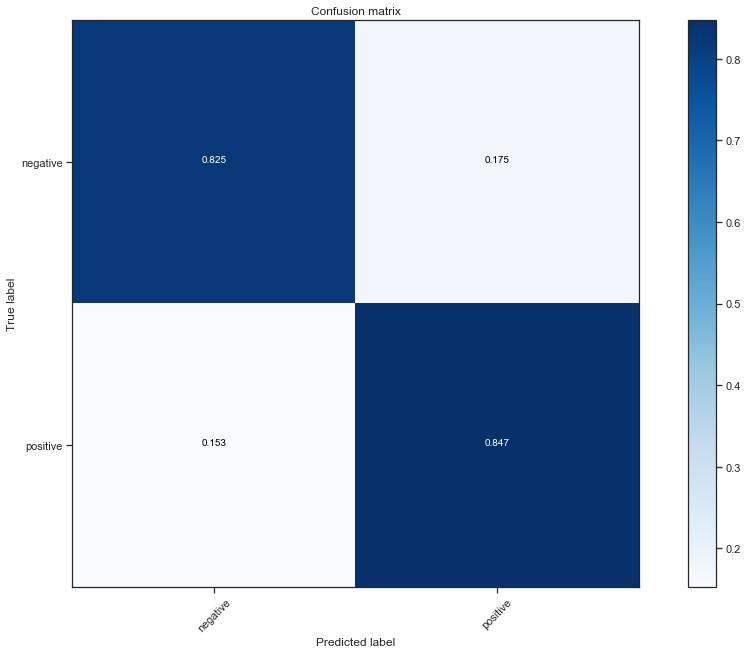

In [347]:
from statlearning import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(14,9))
plot_confusion_matrix(confusion, classes=['negative','positive'], normalize=True)
plt.show()

In [348]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix

columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
rows=['Bernoulli Naive Bayes']
results=pd.DataFrame(0.0, columns=columns, index=rows)

results.iloc[0,0]=  accuracy_score(y_test, y_pred_blNB)
results.iloc[0,1]=  precision_score(y_test, y_pred_blNB)
results.iloc[0,2]=  recall_score(y_test, y_pred_blNB)
results.iloc[0,3]=  f1_score(y_test, y_pred_blNB)
results.iloc[0,4]=  roc_auc_score(y_test, y_prob_blNB[:,1])

results.round(3)

,Accuracy,Precision,Recall,F1 Score,AUC
Bernoulli Naive Bayes,0.836,0.829,0.847,0.838,0.91


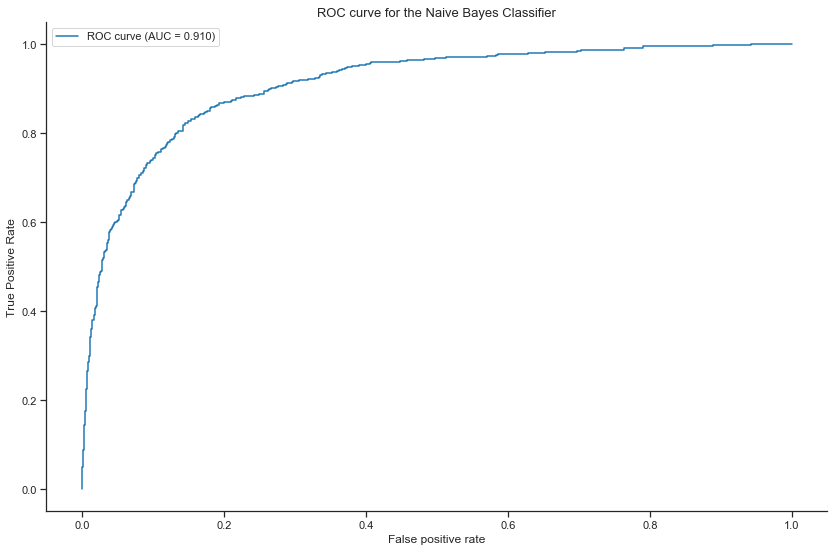

In [349]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob_blNB[:,1])
auc = roc_auc_score(y_test, y_prob_blNB[:,1])

fig, ax= plt.subplots(figsize=(14,9))
ax.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc))
ax.set_xlabel('False positive rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for the Naive Bayes Classifier', fontsize=13)
sns.despine()
plt.legend()
plt.show()